# Session 2 Exercises

These are the exercises from the Session 2 notes

## 3. Accuracy and precision

### In-class

1.	Try these simple calculations: print(0.3 - 0.2), print(0.4 - 0.2) and print(0.3 - (0.1+0.1+0.1)). Why do you think that we get these results?

In [1]:
print(0.3-0.2)
print(0.4-0.2)
print(0.3-(0.1+0.1))

0.09999999999999998
0.2
0.09999999999999998


In [2]:
from math import factorial
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

2.	Run the simple algorithm above (halving epsilon repeatedly) and be sure that you understand what happens, and why.

In [3]:
i=0
epsilon = 1.0
while 1.0+epsilon>1.0:
    i += 1
    print(i,epsilon)
    epsilon /= 2

1 1.0
2 0.5
3 0.25
4 0.125
5 0.0625
6 0.03125
7 0.015625
8 0.0078125
9 0.00390625
10 0.001953125
11 0.0009765625
12 0.00048828125
13 0.000244140625
14 0.0001220703125
15 6.103515625e-05
16 3.0517578125e-05
17 1.52587890625e-05
18 7.62939453125e-06
19 3.814697265625e-06
20 1.9073486328125e-06
21 9.5367431640625e-07
22 4.76837158203125e-07
23 2.384185791015625e-07
24 1.1920928955078125e-07
25 5.960464477539063e-08
26 2.9802322387695312e-08
27 1.4901161193847656e-08
28 7.450580596923828e-09
29 3.725290298461914e-09
30 1.862645149230957e-09
31 9.313225746154785e-10
32 4.656612873077393e-10
33 2.3283064365386963e-10
34 1.1641532182693481e-10
35 5.820766091346741e-11
36 2.9103830456733704e-11
37 1.4551915228366852e-11
38 7.275957614183426e-12
39 3.637978807091713e-12
40 1.8189894035458565e-12
41 9.094947017729282e-13
42 4.547473508864641e-13
43 2.2737367544323206e-13
44 1.1368683772161603e-13
45 5.684341886080802e-14
46 2.842170943040401e-14
47 1.4210854715202004e-14
48 7.105427357601002e-15

3.	Write a function that approximates cosine(x) using a Taylor series expansion, taking both x and N, the largest number in the expansion as arguments. You may use the factorial function from math if you wish: from math import factorial.  The expansion that you need is:

$$\cos(x) \simeq \sum_{i=0}^{N}\frac{(-1)^{i}}{(2i)!} x^{2i}$$

Use the interface below.

By comparing to “exact” results from np.cos, find out how the accuracy changes with the number of terms for a given value of x (you might like to plot a graph with the result). Think about this question: will the results from np.cos actually be exact?

2.0
2.934802200544679
1.1239099258720886
0.21135284298250068
0.023977787376392445
0.0018291040136215742
0.0001004702957823067
4.16780914247461e-06
1.352604445115091e-07
3.5290801392307003e-09


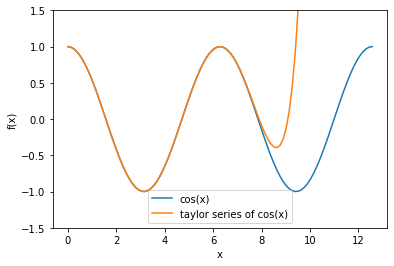

In [4]:
def series_approx_cos(x,N):
    """Takes in variable x and produces a taylor series of cos(x) with N number of terms.
    Inputs:
    x            variable for taylor expansion
    N            Number of terms in taylor expansion
    Outputs:
    approx_cos   Value of taylor expansion at x
    """
    approx_cos = 0.0
    for i in range(N+1): # Choose the correct upper limit
        approx_cos += (((-1)**i)*x**(2*i)/(factorial(2*i)))
    return approx_cos

n=100
N = 10
x = np.linspace(0,4*np.pi, n)
plt.plot(x, np.cos(x))
plt.plot(x,series_approx_cos(x,N))
plt.ylim(-1.5,1.5)
plt.legend(("cos(x)","taylor series of cos(x)"))
plt.xlabel("x")
plt.ylabel("f(x)")

theta = np.pi
for i in range(10):
    difference = abs(np.cos(theta)-series_approx_cos(theta, i))
    print(difference)

### Further work

We are going to approximate cosine by approximating the derivative of sine. Create a function that takes an argument, x, and a small change, dx, and approximates cosine using the definition of the derivative of sine (remember that df/dx≃(f(x+dx)-f(x))/dx). Print the difference to the actual results using `np.cos`. Test the accuracy for dx=1e-5, 1e-10 and 1e-15 (don’t worry if the results seem strange for 1e-15).

In [5]:
def deriv_approx_cos(x,dx):
    (np.sin(x+dx)-np.sin(x))/dx


## 4. Approximating reality

### In-class

The simulation is a very over-simplified model of the Earth-Moon-Sun system (for instance, we will assume perfectly circular orbits). We will calculate and plot the acceleration acting on the Earth and the Moon over time, building up the complexity of the simulation as we go. Start with the following set of definitions for physical constants (note that times are in seconds, which are a little inconvenient, but simple for now).

In [6]:
# Set up time 
total_time = 2*365*24*60*60 # s
days = 730 # Subdivision
time = np.linspace(0,total_time,days)
# Orbits
period_ES = 365*24*60*60 # s
period_ME = 28*24*60*60  # s

# Physical constants, approximated
radius_ES = 1.5e11 # m
radius_ME = 3.8e8  # m
mass_S = 2e30      # kg
mass_E = 6e24      # kg
mass_M = 7e22      # kg
G = 6.7e-11        # m^3 /kg s^2

* We will assume that the Sun is at the origin, and that the Earth and Moon start on the x-axis
* We will further assume that the Earth follows a circular orbit around the Sun, so that:
$$x_{ES}=R_{ES} \cos(2\pi t/T_{ES} )$$
$$y_{ES}=R_{ES} \sin(2\pi t/T_{ES} )$$
* Using the array time, create 1D arrays x_ES and y_ES from the equations just given

In [7]:
x_ES = radius_ES*np.cos(2*np.pi*time/period_ES)
y_ES = radius_ES*np.sin(2*np.pi*time/period_ES)

•	Create a 2D array, pos_ES, that holds the Earth’s position at different times (use `np.array([x_ES,y_ES])` or something similar).

In [8]:
pos_ES = np.array([x_ES,y_ES])

* Now calculate the acceleration that the Earth experiences due to the Sun’s gravitational field as a 2D array:
$$\mathbf{a}_{ES}=-G \frac{M_{S} \mathbf{r}_{ES}}{R_{ES}^{3}}$$
* Note that $\mathbf{r}_{ES}$ is the vector position of the Earth (effectively equivalent to the variable `pos_ES`) while $R_{ES}$ is the radius of the orbit defined above. Plot the two components of the acceleration on the same graph (you can access components easily: for instance, the x-component is `a_ES[0]`), remembering to add axis labels and a title.  I added an x-axis (at y=0) using `plt.axhline()`.

Text(0, 0.5, 'Acceleration due on Earth from Sun (m/s)')

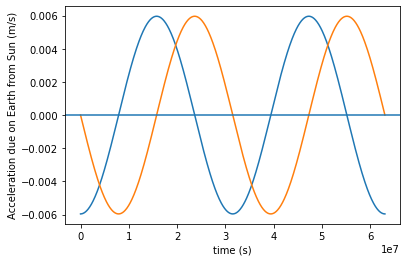

In [9]:
a_ES = -1*G*mass_S*pos_ES/(radius_ES**3)
plt.plot(time,a_ES[0])
plt.plot(time,a_ES[1])
plt.axhline()
plt.xlabel("time (s)")
plt.ylabel("Acceleration due on Earth from Sun (m/s)")

* Create a new 2D array, `pos_ME`, that holds the Moon’s position relative to the Earth (use the exact same approach as you did for the Earth, but remember to replace the radius and period; this will now store $\mathbf{r}_{ME}$ at different times). Add the acceleration  of the Earth due to the Moon’s gravitational field:
$$\mathbf{a}_{EM}=G \frac{M_{M} \mathbf{r}_{ME}}{R_{ME}^{3}}$$
onto $\mathbf{a}_{ES}$ to get $\mathbf{a}_{E}$, and plot this (note that the sign is correct because we calculate the acceleration in terms of $\mathbf{r}_{ME}$). How much difference does the Moon make? Is this reasonable?

Text(0, 0.5, 'Acceleration on Earth from Sun and Moon (m/s)')

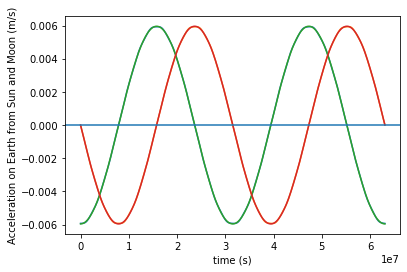

In [10]:
x_ME = radius_ME*np.cos(2*np.pi*time/period_ME)
y_ME = radius_ME*np.sin(2*np.pi*time/period_ME)
pos_ME = np.array([x_ME,y_ME])
a_EM = G*mass_M*pos_ME/(radius_ME**3)
a_E = a_ES + a_EM
plt.plot(time,a_E[0])
plt.plot(time,a_E[1])
plt.plot(time,a_ES[0])
plt.plot(time,a_ES[1])
plt.axhline()
plt.xlabel("time (s)")
plt.ylabel("Acceleration on Earth from Sun and Moon (m/s)")

* Finally plot the acceleration due to the Moon only ($\mathbf{a}_{EM}$). Note what you can learn by plotting this, as opposed to the total acceleration.

0.006


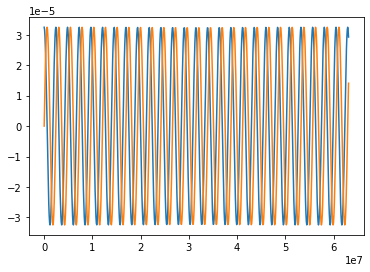

In [11]:
plt.plot(time,a_EM[0])
plt.plot(time,a_EM[1])
print(6*10**(-3))

Moon's orbital periond is far smaller and acceleration is of order $10^{-5}$ while acceleration due to Sun is of order $10^{-3}$. So acceleration from Moon is 100x smaller than acceleration from Sun.

### Further work

We will do the same simulation, but now for the Moon: the vectors will require a little care.
* Start by calculating the acceleration of the Moon due to the Earth’s gravitational field:
$$\mathbf{a}_{ME} = -G \frac{M_{E} \mathbf{r}_{ME}}{R_{ME}^{3}}$$
and plot it as you did for the Earth before.


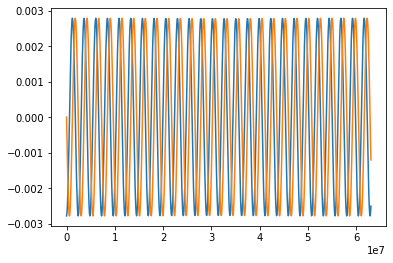

In [12]:
a_ME = -1*G*mass_E*pos_ME/(radius_ME**3)
plt.plot(time,a_ME[0])
plt.plot(time,a_ME[1])

* We will now include the acceleration due to the Sun’s gravitational field. We find $\mathbf{r}_{MS}=\mathbf{r}_{ME}+\mathbf{r}_{ES}$; note that we can do exactly this vector addition for NumPy arrays as well. The acceleration is then:

$$\mathbf{a}_{MS}=-G \frac{M_{S} \mathbf{r}_{MS}}{|\mathbf{r}_{MS} |^{3}}$$

* You will have to calculate $|\mathbf{r}_{MS}|^{3}$ as a Numpy array (but remember that you can operate on entire Numpy arrays in one go: calculate $|\mathbf{r}_{MS}|$ using `np.sqrt`).
* Plot the total acceleration of the Moon, $\mathbf{a}_{M}=\mathbf{a}_{ME}+\mathbf{a}_{MS}$. How much effect does the Sun have compared to the Earth? Is this reasonable?

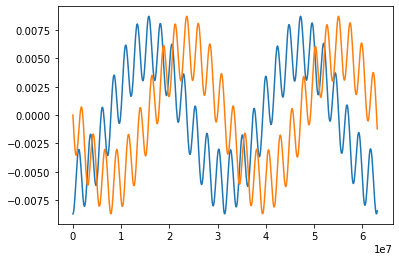

In [13]:
pos_MS = pos_ME + pos_ES
a_MS = -1*G*mass_S*pos_MS/(np.sqrt(np.square(pos_MS[0])+np.square(pos_MS[1])))**3
a_M = a_ME + a_MS
plt.plot(time,a_M[0])
plt.plot(time,a_M[1])

## 5. Finding roots of functions

### In-class

We will be seeking the roots of the cubic function:
$$f(x)=x^3-2x^2-x+2$$
using the different methods described above.

1. Write a function to calculate $f(x)$ (choose a sensible name)

In [14]:
def cubic(x):
    return (x**3-2*x**2-x+2)

2. Define a NumPy array for $-2\le x\le 3$ and using this array plot $f(x)$ between -2 and 3, to get a sense of its behaviour (you may find the command `plt.axhline` useful to add a line at $x=0$).

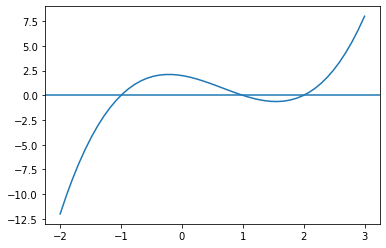

In [15]:
x = np.linspace(-2,3,50)
plt.plot(x,cubic(x))
plt.axhline()

3. Write a simple loop to implement the bisection method to find one root of $f(x)$; choose brackets that enclose one root (by inspection from the plot above). You should specify a tolerance to end the loop (remember the function `abs`), and keep track of how many iterations the loop requires.

In [16]:
a = -2
b = 0
f_a = cubic(a)
f_b = cubic(b)
c = (a + b)/2
tol = 10**(-14)
maxturns = 100
i = 0
while (abs(f_a - f_b) > tol) and (i < maxturns):
    f_a = cubic(a)
    f_b = cubic(b)
    f_c = cubic(c)
    if f_a*f_c > 0:
        a = c
    else:
        b = c
    c = (a + b)/2
    i = i + 1
    print(i, c)

1 -1.5
2 -1.25
3 -1.125
4 -1.0625
5 -1.03125
6 -1.015625
7 -1.0078125
8 -1.00390625
9 -1.001953125
10 -1.0009765625
11 -1.00048828125
12 -1.000244140625
13 -1.0001220703125
14 -1.00006103515625
15 -1.000030517578125
16 -1.0000152587890625
17 -1.0000076293945312
18 -1.0000038146972656
19 -1.0000019073486328
20 -1.0000009536743164
21 -1.0000004768371582
22 -1.000000238418579
23 -1.0000001192092896
24 -1.0000000596046448
25 -1.0000000298023224
26 -1.0000000149011612
27 -1.0000000074505806
28 -1.0000000037252903
29 -1.0000000018626451
30 -1.0000000009313226
31 -1.0000000004656613
32 -1.0000000002328306
33 -1.0000000001164153
34 -1.0000000000582077
35 -1.0000000000291038
36 -1.000000000014552
37 -1.000000000007276
38 -1.000000000003638
39 -1.000000000001819
40 -1.0000000000009095
41 -1.0000000000004547
42 -1.0000000000002274
43 -1.0000000000001137
44 -1.0000000000000568
45 -1.0000000000000284
46 -1.0000000000000142
47 -1.000000000000007
48 -1.0000000000000036
49 -1.0000000000000018
50 -1.00

4.	Now write a function to implement the bisection method. The function should take a function as one of the inputs (so that it is a general implementation), along with brackets and a tolerance. The main problem is book-keeping (updating the brackets). Return the root and the number of iterations taken (and note that when calling your function you would need to do something like `n, x = bisection(...)` as we do for `np.meshgrid`). Use the following interface:

In [17]:
 def bisection(fun,a,b,tol):
    """Write a docstring
    a docstring
    """
    # Evaluate f(a) and f(b) and define c
    f_a = fun(a)
    f_b = fun(b)
    c = (a + b)/2
    # Initialise counter
    n = 0 
    # Set max number of iterations
    maxturns = 200
    # Continue the bisection method
    while (abs(a - b) > tol) and (n < maxturns):
        f_a = fun(a)
        f_c = fun(c)
        if f_a*f_c > 0:
            a = c
        else:
            b = c
        c = (a + b)/2
        n = n + 1
    # Return
    return n, c # Return the correct variables
n, x = bisection(cubic,-3,0,10**(-15))
print(n,x)

52 -1.0


### Further work

1.	For the bisection method, feel free to experiment with the effect of different brackets: in particular, what happens if more than one root is enclosed?

In [18]:
n,x = bisection(cubic,1.5,3,10**(-15))
print(n,x)

51 1.9999999999999998


2. Now write a function to implement either the secant method or the Newton-Raphson method. The inputs should be as for bisection: a function (or a function and its derivative for Newton-Raphson), along with brackets (for secant) or a starting point (for Newton-Raphson) and a tolerance. The main problem again is book-keeping (updating the terms in the iteration). Return the root and the number of iterations taken.  If you are using the Newton-Raphson method, then you should find the analytic derivative of the cubic yourself, and write another function to calculate $f^{\prime}(x)$.  You will need to pass this function as well.

3.	How would you put checks in place to ensure that you caught any divergence in the method? Implement one of them.

## 6. Optimising multi-dimensional functions

We are going to plot a 2D function using `plt.imshow`, exploring two possible ways to do this. In the further work you will explore steepest descents and conjugate gradients.

### In-class

1. Write a Python function that evaluates the 2D function:
$$f(x,y)=\frac{3}{2} x^2+2xy+3y^2-x+4y$$

In [19]:
def polynomial2D(x,y):
    value = 3/2*np.square(x)+2*x*y+3*np.square(y)-x+4*y
    return value

2. First, create 1D arrays for $x$ and $y$ between -5 and 5 (don’t use more than 50 points in the first place). From these, create 2D variables using `np.meshgrid` in the usual way. Evaluate the function you have just defined for these variables.

In [20]:
x = np.linspace(-5,5,50)
y = np.linspace(-5,5,50)
x2D, y2D = np.meshgrid(x,y)
polyvalue = polynomial2D(x2D,y2D)

3.	Plot the function using `plt.imshow`. You might want to pass the extent to `plt.imshow` (`extent=(xmin,xmax,ymin,ymax)` and set the origin to be lower left (`origin=’lower’`) to display the graph nicely.  I found it helpful to add the command `plt.axis(‘scaled’)` to give a square plot.

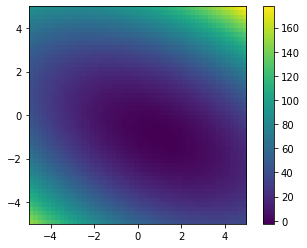

In [21]:
plt.imshow(polyvalue,origin='lower', extent=(-5,5,-5,5))
plt.axis('scaled')
plt.colorbar()

4. Work out analytically the partial derivatives $\partial f/\partial x$  and $\partial f/\partial y$ of $f(x,y)$ and write a function to return the vector gradient of $f(x,y)$ (return the partial derivatives in a two entry NumPy array: `np.array([df_dx, df_dy])`, for instance). It should take a single input, `xin` say, which contains $x$ and $y$ as `xin[0]` and `xin[1]`. Also write a slightly modified version of your function from question 1 that takes the same single input.

In [22]:
def polynomial2D(xin):
    value = 3/2*np.square(xin[0])+2*xin[0]*xin[1]+3*np.square(xin[1])-xin[0]+4*xxin[1]
    return value

def polygradient(xin):
    
    df_dx = 3*xin[0] + 2*xin[1] - 1
    df_dy = 2*xin[0] + 6*xin[1] + 4
    gradient = np.array([df_dx,df_dy])
    return gradient


### Further work

1. Write a function that implements a simple line search: given a function, a starting point, $\mathbf{x}$, and a search direction, $\mathbf{h}(\mathbf{x})$, you should test the value of $f(\mathbf{x}+\lambda\mathbf{h})$ for increasing values of $\lambda$ until the value goes up (this will indicate that you have bracketed the minimum). You only need store the current and new values of the function. Use a simple bisection routine to refine the minimum after bracketing.  (You’ll need to apply bisection to the gradient projected along the direction of the search: $(\partial f/\partial x) h_x + (\partial f/\partial y) h_y$  (where the gradient is calculated at $\lambda$) rather than to the function itself, and search for the value of $\lambda$ that gives zero gradient.)

## 7. SciPy routines

### In-class

1. Using the functions you wrote in question 4 of the exercises in Section 6.1 for the value and gradient (taking one argument), optimise the function from those exercises, $f(x,y)=3/2 x^2+2xy+3y^2-x+4y$, using the conjugate gradients method of `optimize.minimize` from SciPy. Be sure to check the returned result for correctness

### Further work

1.	You might like to test your implementation of the bisection approach against the SciPy bisection method.